In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("vehicle.csv")
df.head(2)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van


In [6]:

df.shape

(846, 19)

In [17]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                             int8
dtype: object

In [18]:
df["class"] = pd.Categorical(df["class"]).codes
df.sample(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
778,111,50.0,103.0,199.0,60.0,11,211.0,31.0,24.0,156,223.0,663.0,188.0,68.0,9.0,9.0,190.0,200,1
456,92,43.0,70.0,124.0,52.0,6,139.0,49.0,18.0,144,164.0,282.0,172.0,79.0,4.0,16.0,183.0,185,2
429,84,37.0,70.0,145.0,62.0,9,136.0,48.0,18.0,134,159.0,280.0,140.0,68.0,11.0,9.0,194.0,202,2
580,85,42.0,66.0,120.0,53.0,7,149.0,45.0,19.0,145,173.0,325.0,163.0,85.0,5.0,4.0,180.0,182,0
263,89,35.0,70.0,138.0,58.0,7,126.0,53.0,17.0,128,147.0,237.0,112.0,64.0,4.0,19.0,199.0,207,2


In [23]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [24]:
df = df.fillna(df.median())

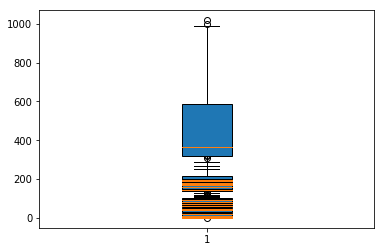

In [25]:
features = df.columns
features

for val in features:
    plt.boxplot(df[val],vert=True,patch_artist=True);

In [26]:
c = df.corr()
d = c["class"]
d.sort_values(ascending=False)

class                          1.000000
elongatedness                  0.339344
hollows_ratio                  0.235874
max.length_aspect_ratio        0.207619
skewness_about                 0.119581
skewness_about.2               0.067244
skewness_about.1              -0.010680
max.length_rectangularity     -0.032399
compactness                   -0.033796
distance_circularity          -0.064467
pr.axis_aspect_ratio          -0.098178
circularity                   -0.158910
radius_ratio                  -0.182186
scaled_radius_of_gyration.1   -0.212601
scaled_radius_of_gyration     -0.250267
pr.axis_rectangularity        -0.258481
scaled_variance.1             -0.288115
scatter_ratio                 -0.288895
scaled_variance               -0.312943
Name: class, dtype: float64

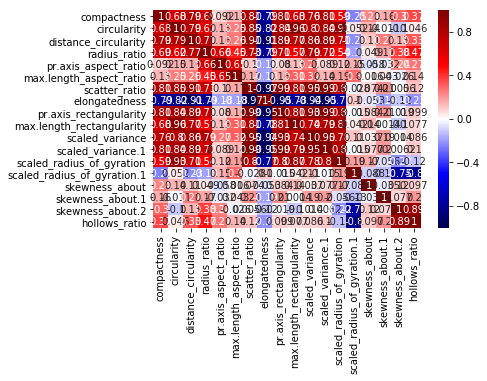

In [27]:
X  = df.drop(columns="class")
y  = df["class"]
corr = X.corr()
sns.heatmap(corr, cmap='seismic', annot=True, vmax=1, vmin=-1)

In [28]:

# Transforming (centralizing) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.1038547

In [29]:
#Getting Eigen Values and Eigen Vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01  1.19922479e-01 -7.83843562e-02
  -6.95178336e-02  1.44875476e-01  4.51862331e-01  5.66136785e-01
   4.84418105e-01  2.60076393e-01 -4.65342885e-02  1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01  2.48205467e-02 -1.87337408e-01
   8.50649539e-02 -3.02731148e-01 -2.49103387e-01  1.79851809e-01
   1.41569001e-02 -9.80779086e-02 -3.01323693e-03 -2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02  5.60143254e-02  7.12008427e-02
  -4.06645651e-02 -1.38405773e-01  7.40350569e-02 -4.34748988e-01
   1.67572478e-01  2.05031597e-01 -7.06489498e-01  3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01 -2.75074211e-01  4.26053415e-02
   4.61473714e-02  

In [30]:
# Transpose of Eigen Values
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,9.404603,3.014922,1.903525,1.179937,0.917261,0.539993,0.35887,0.221932,0.160609,0.091857,0.066499,0.046601,0.035795,0.002964,0.010026,0.027412,0.017917,0.020579


In [31]:
# Cumulative variance 
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.18603365  68.9158021   79.47844095  86.02590063  91.11576952
  94.11218252  96.10354875  97.33504945  98.22626473  98.73597943
  99.10498391  99.36357011  99.5621946   99.71430385  99.82849808
  99.92791726  99.98355026 100.        ]


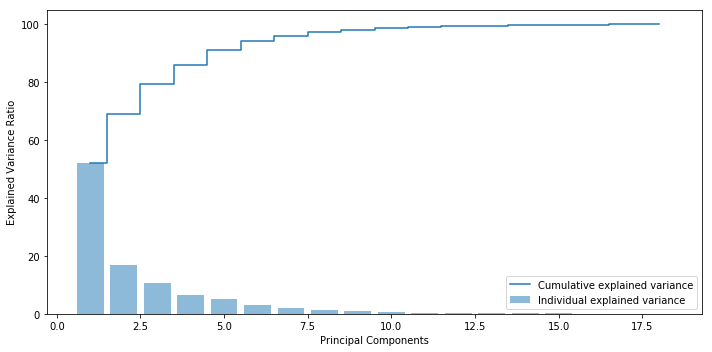

In [32]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [34]:
def svc_param_selection(X, y):
    svm = SVC()
    parameters = {'kernel':('linear', 'rbf'), 'C':(0.01, 0.05, 0.5, 1)}
    grid_search = GridSearchCV(svm,parameters)
    grid_search.fit(X, y)
    return grid_search

In [35]:
grid_search =svc_param_selection(X,y)

In [36]:
grid_search


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': (0.01, 0.05, 0.5, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
from sklearn.model_selection import cross_val_score
print("accuracy:"+str(np.average(cross_val_score(grid_search, X_std, y, scoring='accuracy'))))


accuracy:0.9645260605128766


/anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
